# Trips Data Cleaning

## Summary

Bike Supply is a PyMC3-driven Bayesian predictive model of an urban bike share company's supply-demand dynamics. This model was built using public data supplied by Bay Area Bike Share. This model was built to answer the question - is it possible to build a model that predicts the volume of bikes entering and leaving a station for any given day of the year?

Bike sharing programs have the unique challenge of needing to ensure bikes and docking stations are available throughout the city for users throughout the day, even though users have the freedom to choose their own destinations rental by rental. 

## Load

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pprint

data = pd.read_csv('big_query_data.csv')

IOError: File big_query_data.csv does not exist

In [2]:
data[0:5]

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type
0,650330,495,2015-02-19 15:46:00 UTC,Yerba Buena Center of the Arts (3rd @ Howard),68,2015-02-19 15:54:00 UTC,San Francisco Caltrain 2 (330 Townsend),69,463,94061,Subscriber
1,367544,241,2014-07-17 08:09:00 UTC,San Francisco Caltrain 2 (330 Townsend),69,2014-07-17 08:13:00 UTC,Townsend at 7th,65,441,95120,Subscriber
2,586344,3589,2014-12-27 16:01:00 UTC,Embarcadero at Bryant,54,2014-12-27 17:01:00 UTC,2nd at Townsend,61,466,27401,Customer
3,772874,733,2015-05-19 09:50:00 UTC,Davis at Jackson,42,2015-05-19 10:02:00 UTC,2nd at Townsend,61,501,94111,Subscriber
4,419431,302,2014-08-21 19:11:00 UTC,5th at Howard,57,2014-08-21 19:16:00 UTC,San Francisco Caltrain (Townsend at 4th),70,392,95110,Subscriber


In [3]:
print "Number of stations:",len(data.start_station_name.unique())
print "Number of bikes:", len(data.bike_number.unique())
print "Number of trips logged:", len(data)

Number of stations: 84
Number of bikes: 700
Number of trips logged: 983648


In [4]:
# Remove UTC from datatime !!Don't do this more than once!!
data['start_date'] = data['start_date'].astype(str).str[:-3]

In [5]:
data['start_date'] = pd.to_datetime(data['start_date'])

In [6]:
data['end_date'] = pd.to_datetime(data['end_date'])

In [7]:
data[0:3]

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type
0,650330,495,2015-02-19 15:46:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2015-02-19 15:54:00,San Francisco Caltrain 2 (330 Townsend),69,463,94061,Subscriber
1,367544,241,2014-07-17 08:09:00,San Francisco Caltrain 2 (330 Townsend),69,2014-07-17 08:13:00,Townsend at 7th,65,441,95120,Subscriber
2,586344,3589,2014-12-27 16:01:00,Embarcadero at Bryant,54,2014-12-27 17:01:00,2nd at Townsend,61,466,27401,Customer


In [8]:
print "Number of years in dataset:", len(data.start_date.dt.year.unique())

Number of years in dataset: 4


In [9]:
data['start_just_date'] = data.start_date.dt.date

In [10]:
data['end_just_date'] = data.end_date.dt.date

In [11]:
data['year'] = data.start_date.dt.year

In [12]:
data['month'] = data.start_date.dt.month

In [13]:
data['start_day'] = data.start_date.dt.day

In [14]:
data['start_time'] = data.start_date.dt.time

In [15]:
data['end_day'] = data.end_date.dt.day

In [16]:
data['end_time'] = data.end_date.dt.time

In [17]:
data[0:5]

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time
0,650330,495,2015-02-19 15:46:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2015-02-19 15:54:00,San Francisco Caltrain 2 (330 Townsend),69,463,94061,Subscriber,2015-02-19,2015-02-19,2015,2,19,15:46:00,19,15:54:00
1,367544,241,2014-07-17 08:09:00,San Francisco Caltrain 2 (330 Townsend),69,2014-07-17 08:13:00,Townsend at 7th,65,441,95120,Subscriber,2014-07-17,2014-07-17,2014,7,17,08:09:00,17,08:13:00
2,586344,3589,2014-12-27 16:01:00,Embarcadero at Bryant,54,2014-12-27 17:01:00,2nd at Townsend,61,466,27401,Customer,2014-12-27,2014-12-27,2014,12,27,16:01:00,27,17:01:00
3,772874,733,2015-05-19 09:50:00,Davis at Jackson,42,2015-05-19 10:02:00,2nd at Townsend,61,501,94111,Subscriber,2015-05-19,2015-05-19,2015,5,19,09:50:00,19,10:02:00
4,419431,302,2014-08-21 19:11:00,5th at Howard,57,2014-08-21 19:16:00,San Francisco Caltrain (Townsend at 4th),70,392,95110,Subscriber,2014-08-21,2014-08-21,2014,8,21,19:11:00,21,19:16:00


In [18]:
print "Max duration", max(data.duration_sec)

Max duration 17270400


In [19]:
print "Min duration", min(data.duration_sec)

Min duration 60


In [20]:
longer_than_one_day = data.query("duration_sec >= 86400")

In [21]:
len(longer_than_one_day)

296

In [22]:
longer_than_one_day[0:5]

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time
5288,110653,213405,2013-11-29 10:31:00,Cowper at University,37,2013-12-01 21:48:00,Cowper at University,37,668,94301,Customer,2013-11-29,2013-12-01,2013,11,29,10:31:00,1,21:48:00
9300,298294,156790,2014-05-26 13:02:00,Grant Avenue at Columbus Avenue,73,2014-05-28 08:35:00,Mechanics Plaza (Market at Battery),75,404,94133,Customer,2014-05-26,2014-05-28,2014,5,26,13:02:00,28,08:35:00
10982,360916,101521,2014-07-12 12:48:00,Harry Bridges Plaza (Ferry Building),50,2014-07-13 17:00:00,Broadway St at Battery St,82,632,94133,Customer,2014-07-12,2014-07-13,2014,7,12,12:48:00,13,17:00:00
13278,823564,110571,2015-06-26 09:50:00,California Ave Caltrain Station,36,2015-06-27 16:33:00,California Ave Caltrain Station,36,165,94306,Customer,2015-06-26,2015-06-27,2015,6,26,09:50:00,27,16:33:00
13564,784285,102107,2015-05-28 10:15:00,Redwood City Caltrain Station,22,2015-05-29 14:36:00,Stanford in Redwood City,25,179,94040,Customer,2015-05-28,2015-05-29,2015,5,28,10:15:00,29,14:36:00


In [23]:
type(data['year'][0])

numpy.int64

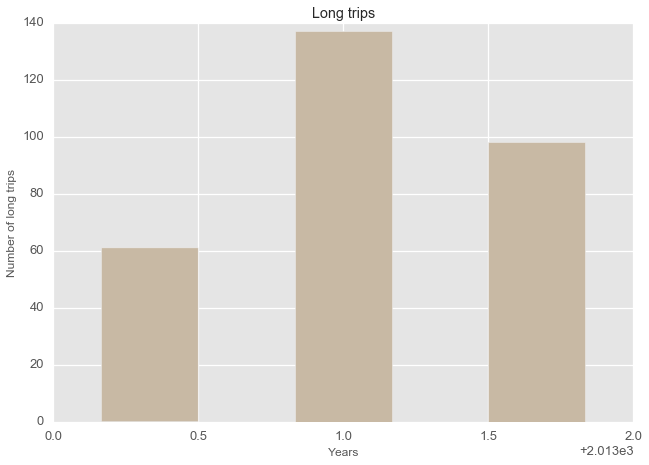

In [67]:
# How are these distributed over the years?

plt.style.use('ggplot')

plt.figure()

plot = plt.hist(longer_than_one_day['year'], 3, histtype='bar', color = '#c8b9a4', rwidth=0.5)
plt.title('Long trips')
plt.xlabel('Years')
plt.ylabel('Number of long trips')

In [25]:
#Seems this might be some kind of outlier experience that is decreasing as the business grows
#Maybe I cut it too close to the bone, let me try within 2 days (to include overnight trips)

longer_than_two_days = data.query("duration_sec >= 172800")
len(longer_than_two_days)

137

In [26]:
#At this point, I mostly care about 2015 and 2016, so let me plot all points less than 2 days and look at the data

# less_than_two_days = data.query("trip_length <= 172800")

less_than_two_days = data[(data['duration_sec'] <= 172800) & (data['year'] == 2016)]

In [27]:
data['end_yyyymmdd'] = (
    data['end_date'].dt.year.astype(str) + 
    data['end_date'].dt.month.astype(str).str.zfill(2) + 
    data['end_date'].dt.day.astype(str).str.zfill(2))

In [28]:
data['end_yyyymmdd'] = data['end_yyyymmdd'].astype(int)

In [29]:
less_than_two_days_2016 = data[(data['duration_sec'] <= 172800) & (data['year'] == 2016)]

In [30]:
less_than_two_days_2016[0:5]

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time,end_yyyymmdd
10,1279437,1017,2016-07-16 16:05:00,Powell Street BART,39,2016-07-16 16:21:00,Civic Center BART (7th at Market),72,441,92844,Customer,2016-07-16,2016-07-16,2016,7,16,16:05:00,16,16:21:00,20160716
21,1189381,510,2016-05-05 12:00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2016-05-05 12:09:00,Embarcadero at Folsom,51,635,2130,Customer,2016-05-05,2016-05-05,2016,5,5,12:00:00,5,12:09:00,20160505
27,1225665,577,2016-06-03 11:55:00,Embarcadero at Sansome,60,2016-06-03 12:05:00,Harry Bridges Plaza (Ferry Building),50,510,94040,Customer,2016-06-03,2016-06-03,2016,6,3,11:55:00,3,12:05:00,20160603
28,1196140,400,2016-05-11 08:56:00,Temporary Transbay Terminal (Howard at Beale),55,2016-05-11 09:02:00,5th at Howard,57,527,94103,Subscriber,2016-05-11,2016-05-11,2016,5,11,08:56:00,11,09:02:00,20160511
30,1220829,194,2016-05-31 12:47:00,Commercial at Montgomery,45,2016-05-31 12:51:00,Davis at Jackson,42,620,94965,Subscriber,2016-05-31,2016-05-31,2016,5,31,12:47:00,31,12:51:00,20160531


In [31]:
less_than_two_days_2016_May = data[(data['duration_sec'] <= 172800) & (data['year'] == 2016) & (data['month'] == 5)]

In [32]:
less_than_two_days_2015_May = data[(data['duration_sec'] <= 172800) & (data['year'] == 2015) & (data['month'] == 5)]

In [33]:
len(less_than_two_days_2016_May)

28322

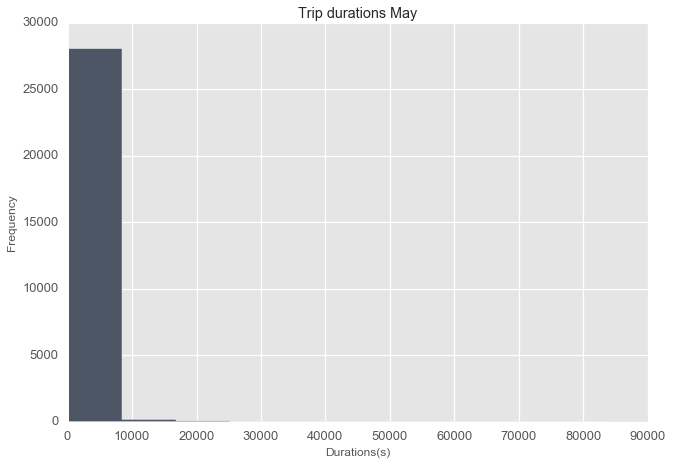

In [71]:
data = less_than_two_days_2016_May['duration_sec']

plt.figure()

plot = plt.hist(data, 10, histtype='stepfilled', color = '#4d5665')
plt.title('Trip durations May')
plt.xlabel('Durations(s)')
plt.ylabel('Frequency')

In [45]:
less_than_two_days_2016_May[0:5]

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time,end_yyyymmdd
21,1189381,510,2016-05-05 12:00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2016-05-05 12:09:00,Embarcadero at Folsom,51,635,2130,Customer,2016-05-05,2016-05-05,2016,5,5,12:00:00,5,12:09:00,20160505
28,1196140,400,2016-05-11 08:56:00,Temporary Transbay Terminal (Howard at Beale),55,2016-05-11 09:02:00,5th at Howard,57,527,94103,Subscriber,2016-05-11,2016-05-11,2016,5,11,08:56:00,11,09:02:00,20160511
30,1220829,194,2016-05-31 12:47:00,Commercial at Montgomery,45,2016-05-31 12:51:00,Davis at Jackson,42,620,94965,Subscriber,2016-05-31,2016-05-31,2016,5,31,12:47:00,31,12:51:00,20160531
35,1208884,534,2016-05-20 07:58:00,2nd at Townsend,61,2016-05-20 08:07:00,Embarcadero at Folsom,51,350,95148,Subscriber,2016-05-20,2016-05-20,2016,5,20,07:58:00,20,08:07:00,20160520
50,1212010,262,2016-05-23 16:45:00,Embarcadero at Folsom,51,2016-05-23 16:49:00,Harry Bridges Plaza (Ferry Building),50,494,94112,Subscriber,2016-05-23,2016-05-23,2016,5,23,16:45:00,23,16:49:00,20160523


In [36]:
less_than_two_days_2016_May_1 = less_than_two_days_2016_May.query('start_day == 1')

In [37]:
len(less_than_two_days_2016_May_1)

243

In [46]:
less_than_two_days_2016_May_1[0:5]

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time,end_yyyymmdd
12326,1183579,7898,2016-05-01 21:52:00,Market at 4th,76,2016-05-02 00:03:00,Market at 4th,76,530,33141,Customer,2016-05-01,2016-05-02,2016,5,1,21:52:00,2,00:03:00,20160502
13632,1183330,352,2016-05-01 12:55:00,Japantown,9,2016-05-01 13:01:00,Ryland Park,84,702,95110,Subscriber,2016-05-01,2016-05-01,2016,5,1,12:55:00,1,13:01:00,20160501
14540,1183282,282,2016-05-01 11:11:00,San Antonio Shopping Center,31,2016-05-01 11:16:00,San Antonio Caltrain Station,29,233,94107,Subscriber,2016-05-01,2016-05-01,2016,5,1,11:11:00,1,11:16:00,20160501
18715,1183440,2488,2016-05-01 16:31:00,Embarcadero at Sansome,60,2016-05-01 17:13:00,San Francisco Caltrain 2 (330 Townsend),69,388,94107,Customer,2016-05-01,2016-05-01,2016,5,1,16:31:00,1,17:13:00,20160501
21671,1183224,777,2016-05-01 08:41:00,2nd at Townsend,61,2016-05-01 08:54:00,Embarcadero at Sansome,60,327,94107,Subscriber,2016-05-01,2016-05-01,2016,5,1,08:41:00,1,08:54:00,20160501


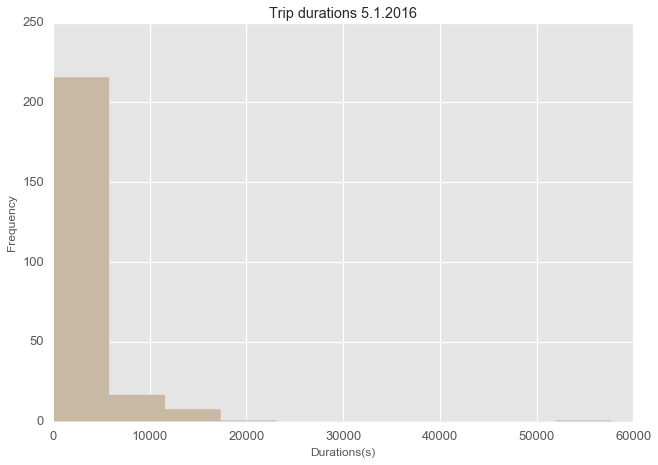

In [73]:
# Plot bar plot of all lengths
data = less_than_two_days_2016_May_1['duration_sec']
plot = plt.hist(data, 10, histtype='stepfilled', color = '#c8b9a4')
plt.title('Trip durations 5.1.2016')
plt.xlabel('Durations(s)')
plt.ylabel('Frequency')

Most hover in the low bin, around 5,000 (1.5 hours). The upper bound is 14 hours (long bike adventure?). It seems the use cases point to commuting and errands. 

## Weekday/Weekend

In [40]:
temp = pd.DatetimeIndex(less_than_two_days['end_date'])
less_than_two_days['weekday'] = temp.weekday

In [41]:
for i, row in less_than_two_days.iterrows():
    if row['weekday'] == 5 or row['weekday'] == 6:
        less_than_two_days.set_value(i,'is_weekend', True)
    else:
        less_than_two_days.set_value(i,'is_weekend', False)
    

In [42]:
less_than_two_days[0:5]

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time,weekday,is_weekend
10,1279437,1017,2016-07-16 16:05:00,Powell Street BART,39,2016-07-16 16:21:00,Civic Center BART (7th at Market),72,441,92844,...,2016-07-16,2016-07-16,2016,7,16,16:05:00,16,16:21:00,5,True
21,1189381,510,2016-05-05 12:00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2016-05-05 12:09:00,Embarcadero at Folsom,51,635,2130,...,2016-05-05,2016-05-05,2016,5,5,12:00:00,5,12:09:00,3,False
27,1225665,577,2016-06-03 11:55:00,Embarcadero at Sansome,60,2016-06-03 12:05:00,Harry Bridges Plaza (Ferry Building),50,510,94040,...,2016-06-03,2016-06-03,2016,6,3,11:55:00,3,12:05:00,4,False
28,1196140,400,2016-05-11 08:56:00,Temporary Transbay Terminal (Howard at Beale),55,2016-05-11 09:02:00,5th at Howard,57,527,94103,...,2016-05-11,2016-05-11,2016,5,11,08:56:00,11,09:02:00,2,False
30,1220829,194,2016-05-31 12:47:00,Commercial at Montgomery,45,2016-05-31 12:51:00,Davis at Jackson,42,620,94965,...,2016-05-31,2016-05-31,2016,5,31,12:47:00,31,12:51:00,1,False


## Print out May trips testing files

In [43]:
less_than_two_days_2016_May.to_csv("may_2016.csv")

In [44]:
less_than_two_days_2015_May.to_csv("may_2015.csv")